In [1]:
using Graphs, MetaGraphsNext

includet("../../utils/import_utils.jl")
includet("../../utils/visu.jl")
includet("io.jl")
includet("generate-caps.jl")

#includet("io.jl")

In [21]:
function read_sndlib_graph(filename::String)
    # Initialiser un graphe vide
    g = Graph()

    # Dictionnaires pour stocker les nœuds et les liens
    nodes = Dict{String, Int}()
    edges = Vector{Tuple{Int, Int}}()

    # Variables pour stocker les sections actuelles
    in_nodes_section = false
    in_links_section = false
    
    current_nb = 1
    lines = 0
    open(filename, "r") do file
        lines = readlines(file)
    end

    # Lire le contenu du fichier ligne par ligne
    for line in lines
        line = strip(line)

        #println("line: $line")
        if occursin("NODES", line)
            println("Ya")
            in_nodes_section = true
            in_links_section = false
            continue
        elseif occursin("LINKS", line)
            in_nodes_section = false
            in_links_section = true
            continue
        elseif occursin(")", line) && !occursin("(", line) 
            in_nodes_section = false
            in_links_section = false
            continue
        end

        if in_nodes_section
            # Lire les nœuds
            parts = split(line)
            #println("Hello there ! m : $parts")
            if parts !== nothing
                node_id = parts[1]
                #longitude = parse(Float64, parts[2])
                #latitude = parse(Float64, parts[3])
                add_vertex!(g)
                nodes[node_id] = current_nb 
                current_nb += 1
                #println("Node $node_id with nb $(nodes[node_id])")
            end
        elseif in_links_section
            # Lire les liens
            parts = split(line, r"[ ()]+")
            if parts !== nothing
                source = parts[2]
                target = parts[3]
                if haskey(nodes, source) && haskey(nodes, target)
                    push!(edges, (nodes[source], nodes[target]))
                end
            end
        end
    end

    # Ajouter les arêtes au graphe
    for (src, dst) in edges
        add_edge!(g, src, dst)
    end

    return g
end

read_sndlib_graph (generic function with 1 method)

Ya


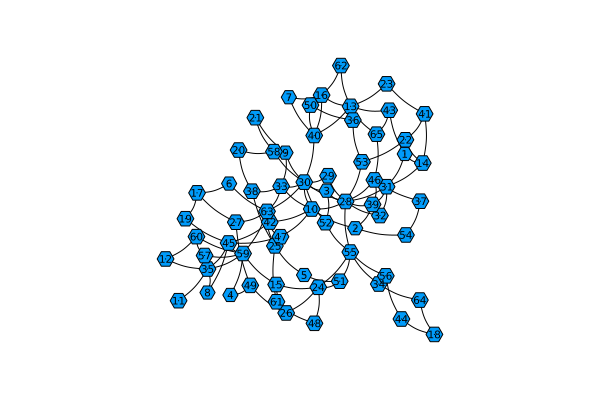

In [23]:
path = "sndlib/ta2.graph"

g = read_sndlib_graph(path)

visu_graph(g)

In [24]:
println("Graph with $(nv(g)) nodes and $(ne(g)) arretes")

Graph with 65 nodes and 108 arretes


In [26]:
put_as_virtual(g)

UndefVarError: UndefVarError: `put_as_virtual` not defined

In [27]:
put_as_virtual_and_save(g, "ta2")

6263